In [1]:
import numpy as np
import matplotlib.pyplot as plt

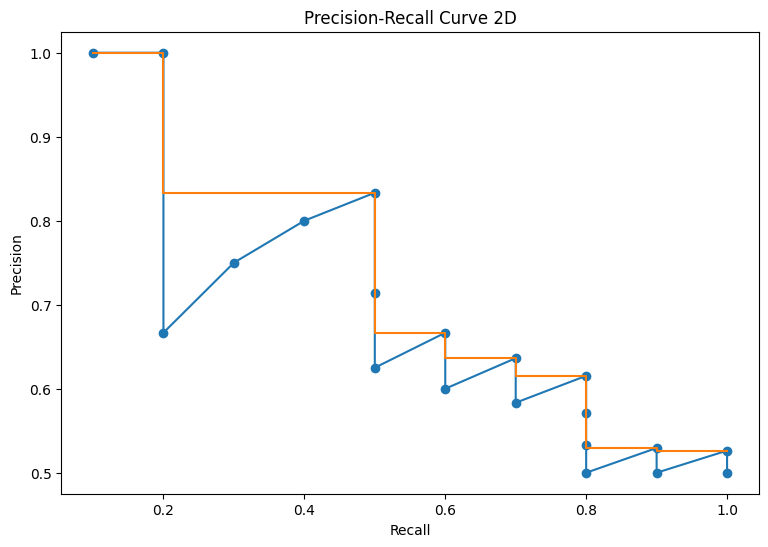

In [51]:
y_true = np.array([1,1,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0])
y_scores = np.array([0.9,0.8,0.7,0.6,0.55,0.54,0.53,0.52,0.51,0.505,0.4,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.3,0.1 ])
recall, precision = [] , []

def get_recall(y_true,y_scores, threshold):
    predict_positive_num = len(y_scores[y_scores >= threshold])
    tp = len( [x for x in y_true[:predict_positive_num] if x == 1] )
    ground_truth  = len(y_true[y_true==1])
    recall = tp / ground_truth
    return recall

def get_precision(y_true,y_scores, threshold):
    predict_positive_num = len(y_scores[y_scores >= threshold])
    tp = len( [x for x in y_true[:predict_positive_num] if x == 1] )
    fp = len( [x for x in y_true[:predict_positive_num] if x == 0] )
    precision = tp / (tp + fp) 
    return precision 

def recall_precision_plot(y_true, y_scores):
    for _ in y_scores: # y_scores 를 thresholds 처럼 사용했음
        recall.append(get_recall(y_true, y_scores, _))
        precision.append(get_precision(y_true, y_scores, _))
    
    curve = zip(recall, precision)
    curve_for_area = []
    deque_prev = [] 
    deque_next = [] 
    for r, p in curve:
        if not deque_next: # 스택에 값이 없으면 한 개 채워줌
            deque_next.append([r, p])
        else: # 스택에 값이 있으면 
            if deque_next[-1][1] <= p: # 그래프가 계속 증가하는 중이라면
                deque_next.append([r, p])
            else: # 그래프가 감소했다면:                
                len_deque_prev = len(deque_next)
                p_for_area = deque_next[-1][1]
                if deque_prev:
                    curve_for_area.append([deque_prev[-1][0], p_for_area])
                deque_prev = deque_next.copy()
                while deque_next:
                    r, p = deque_next.pop(0)
                    curve_for_area.append([r, p_for_area]) # (r, p)들을 스택에 기록
                
    fig = plt.figure(figsize = (9,6))
    plt.plot(recall, precision)
    plt.scatter(recall, precision)
    plt.plot([row[0] for row in curve_for_area], [row[1] for row in curve_for_area])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve 2D')
    plt.show()
    
recall_precision_plot(y_true,y_scores)